In [11]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import joblib


In [4]:
# 2. Carregar dataset
df = pd.read_csv("../data/imdb_top_1000.csv")
X = df["Overview"].fillna("")
y = df["Genre"].str.split(",").str[0]  # gênero primário

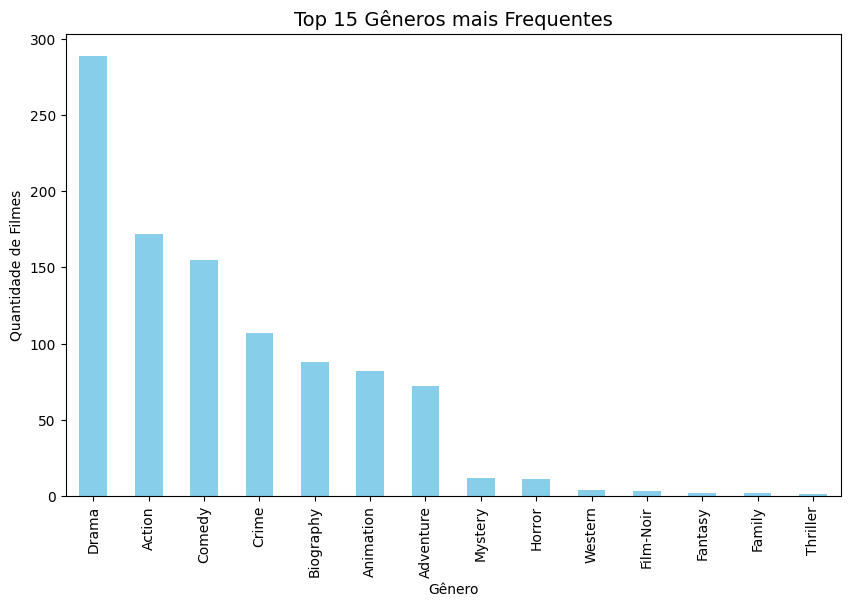

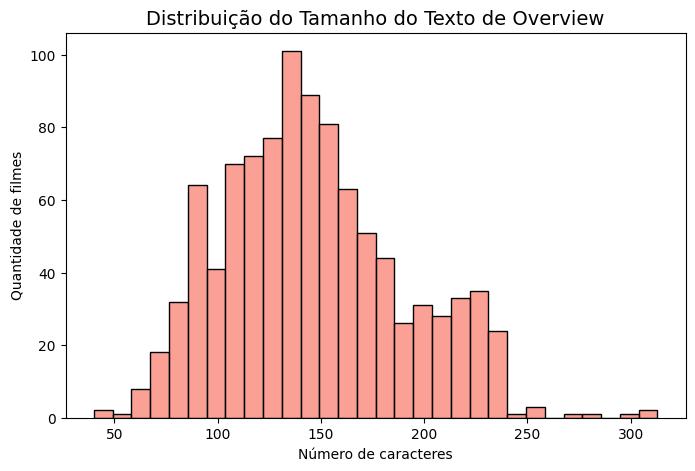

In [12]:
# Distribuição dos gêneros principais
plt.figure(figsize=(10,6))
y.value_counts().head(15).plot(kind="bar", color="skyblue")
plt.title("Top 15 Gêneros mais Frequentes", fontsize=14)
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Filmes")
plt.show()

# Distribuição do tamanho dos overviews
df["overview_len"] = df["Overview"].fillna("").apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df["overview_len"], bins=30, color="salmon")
plt.title("Distribuição do Tamanho do Texto de Overview", fontsize=14)
plt.xlabel("Número de caracteres")
plt.ylabel("Quantidade de filmes")
plt.show()


In [14]:
# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# 4. Pipeline TF-IDF + LogisticRegression
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=2000, ngram_range=(1,2))),
    ("clf", LogisticRegression(max_iter=200))
])

In [7]:
# 5. Treinar e avaliar
pipeline.fit(X_train, y_train)
print("Acurácia (teste):", pipeline.score(X_test, y_test))

Acurácia (teste): 0.35


In [15]:
# 6. Salvar modelo
joblib.dump(pipeline, "../models/movie_genre_model.pkl")
print("Modelo salvo em ../models/movie_genre_model.pkl")

Modelo salvo em ../models/movie_genre_model.pkl
